# Drill

1. Place the steps in order for writing a `pandas` DataFrame into an `xlsxwriter` workbook. 

- Set the `pandas` Excel-writing engine to `xlsxwriter` with `ExcelWriter()`.  
- Convert the DataFrame into an `xlsxwriter` object with `to_excel()`.  
- Create workbook and worksheet objects for the resulting output with `writer.book` and `writer.sheets`.



2. Fill out the below code to write this DataFrame to a workbook named `hr.xlsx` and worksheet named `leaders`. 



In [ ]:
import pandas as pd
import xlsxwriter

# Create a DataFrame
data = {'player':['Barry', 'Hank', 'Babe', 'Alex', 'Wille'],'hr':[762,755,714,696,660]}
df = pd.DataFrame(data)

# Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter(___, engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, ___=___, index=False)

# Get the xsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets[___]

workbook.close()

In [ ]:
import pandas as pd
import xlsxwriter

# Create a DataFrame
data = {'player':['Barry', 'Hank', 'Babe', 'Alex', 'Wille'],'hr':[762,755,714,696,660]}
df = pd.DataFrame(data)

# Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('hr.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='leaders', index=False)

# Get the xsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets['leaders']

workbook.close()

# Drill

Complete the code scaffolding to format the following:

- Format the cells of boroughs with a land area greater than 50 square miles with a green format.
- Add a two-grade color scale to the population column.  


In [ ]:
import pandas as pd
import xlsxwriter

# Create a DataFrame of land sizes of NYC boroughs
data = {'borough':['The Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],'land_area':[42.10,70.82,22.83,108.53,58.37],'population':[1418207,2559903,1628706,2253858,476143]}

nyc = pd.DataFrame(data)

# Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('nyc.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
nyc.to_excel(writer, sheet_name='Sheet1', index=False)

# Get the xlsxwriter objects from the dataframe writer object
workbook  = writer.book
worksheet = writer.sheets['Sheet1']


# Set green fill with dark green text format
green_format = workbook.add_format({'bg_color': '#C6EFCE',
'font_color': '#006100'})

# Format cells of boroughs with land area over 50 sq miles
worksheet.conditional_format('B2:B6', {'type': 'cell',
'criteria': 'greater than',
'value': 50,
'format': green_format})

# Format two-grade color scale to the population cells
worksheet.conditional_format('C2:C6', {'type': '2_color_scale'})

# Close the workbook
workbook.close()

# Drill: 

Insert a DataFrame and scatterplot in Python. 

I will fill out the information to complete the scatterplot -- you focus on the `xlsxwriter`-related parts.  

In [4]:
import pandas as pd
import xlsxwriter
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame of land sizes of NYC boroughs
mpg = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")

# View first rows of data 
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [2]:
# Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('mpg.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
# Do not display the index when we export
# Name the worksheet 'data'.
mpg.to_excel(writer, sheet_name='data', index=False)

# Get the xlsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets['data']

# Let's freeze the pane of this worksheet while we're at it
worksheet.freeze_panes(1,0)

# Set column widths
worksheet.set_column('A:I',12)


0

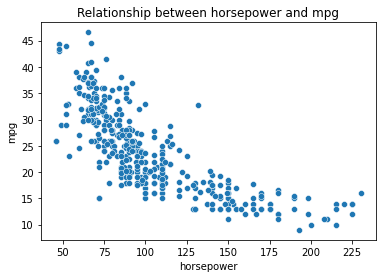

In [5]:
### This code is finished ###
sns.scatterplot(x='horsepower', y='mpg', data=mpg)
plt.title('Relationship between horsepower and mpg')



# Save the image-- we will need this for later
plt.savefig('mpg.png', bbox_inches='tight', dpi = (400))


In [ ]:
# Create a new worksheet called `scatter`
worksheet2 = workbook.add_worksheet('scatter')

# Add the image `mpg.png` to the workbook
worksheet2.insert_image('A1', 'mpg.png')

# Close the workbook and admire your creation!
workbook.close()